# Model Evaluation and Visualization

This notebook evaluates the trained ASL alphabet recognition model and visualizes its performance using the test dataset. It includes loading the model, evaluating accuracy, and plotting a confusion matrix and classification report.

In [13]:
# Load the trained model and test data
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Path to model and test data
data_dir = '../data/'
model_path = '../models/asl_cnn_model.h5'

# Load model
model = tf.keras.models.load_model(model_path)


## Evaluate the Model

Evaluate the model on the test set and display accuracy, confusion matrix, and classification report.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        28
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00 

c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


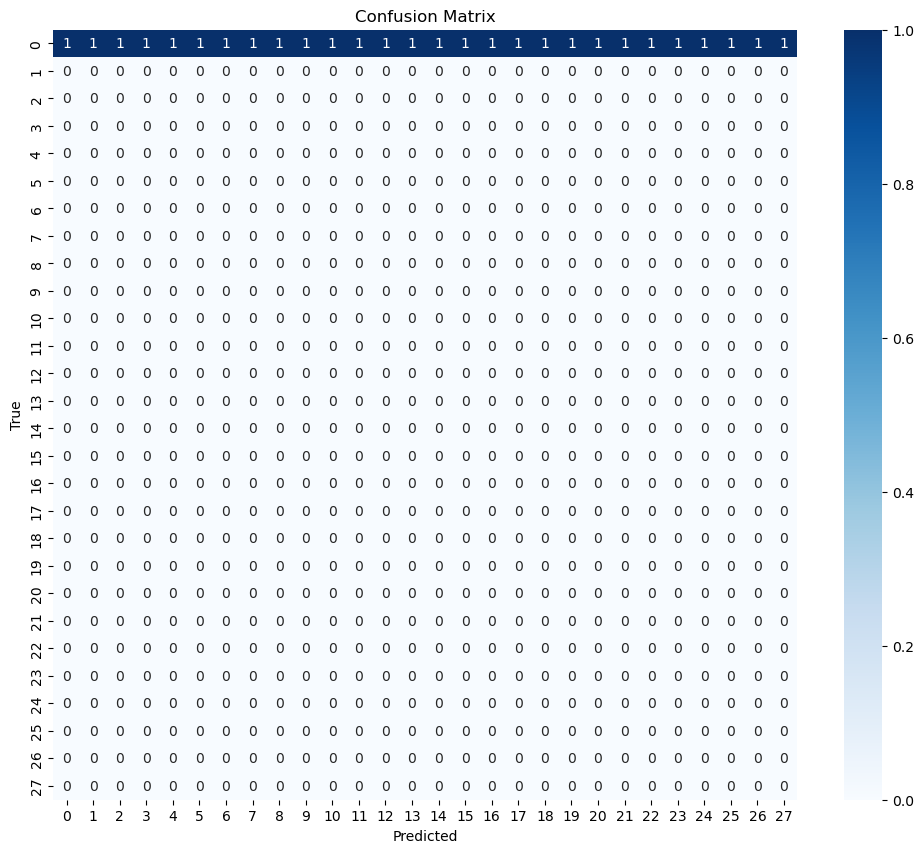

Test Label Distribution:
Label 0: 28 samples
Sample Predictions:
True Label: 0, Predicted: 0
True Label: 0, Predicted: 1
True Label: 0, Predicted: 2
True Label: 0, Predicted: 3
True Label: 0, Predicted: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Training Subset Evaluation:
True Label: 0, Predicted: 0
True Label: 0, Predicted: 1
True Label: 0, Predicted: 2
True Label: 0, Predicted: 3
True Label: 0, Predicted: 4
True Label: 0, Predicted: 5
True Label: 0, Predicted: 6
True Label: 0, Predicted: 7
True Label: 0, Predicted: 8
True Label: 0, Predicted: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Training Subset Evaluation:
True Label: 0, Predicted: 0
True Label: 0, Predicted: 1
True Label: 0, Predicted: 2
True Label: 0, Predicted: 3
True Label: 0, Predicted: 4
True Label: 0, Predicted: 5
True Label: 0, Predicted: 6
True Label: 0, Predicted: 7
True Label: 0, Predicted: 8
True Label: 0, Predicted: 9


In [14]:
# Import preprocessing functions from the 01_preprocessing notebook
def load_dataset(data_dir):
    """
    Load dataset from the specified directory.

    Args:
        data_dir (str): Path to the dataset directory

    Returns:
        tuple: (images, labels) - Loaded images and their corresponding labels
    """
    import os
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    images = []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)
                image = load_img(image_path, target_size=(224, 224))  # Resize to match model input
                image = img_to_array(image)
                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load test data
TEST_DATA_DIR = TEST_DATA_DIR = "C:/Users/User/OneDrive - belgiumcampus.ac.za/Marius_Grassman/ML-Sign-Language-Recognition/data/asl_alphabet_test"
test_images, test_labels = load_dataset(TEST_DATA_DIR)


def resize_images(images, target_size=(224, 224)):
    """
    Resize images to a consistent target size.

    Args:
        images (array): Array of images to resize
        target_size (tuple): Target size (height, width)

    Returns:
        np.array: Array of resized images
    """
    resized_images = [tf.image.resize(image, target_size) for image in images]
    return np.array(resized_images)

def normalize_images(images):
    """
    Normalize pixel values from [0, 255] to [0, 1].

    Args:
        images (array): Array of images to normalize

    Returns:
        np.array: Array of normalized images
    """
    normalized_images = images / 255.0
    return normalized_images

def encode_labels(labels):
    """
    Encode text labels into numerical values.

    Args:
        labels (array): Array of text labels (e.g., ['A', 'B', 'C'])

    Returns:
        array: Encoded numerical labels
    """
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    return encoded_labels

# Preprocess test data
test_images = resize_images(test_images)
test_images = normalize_images(test_images)
test_labels = encode_labels(test_labels)

# Evaluate model
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
y_true = test_labels

print('Classification Report:')
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Debugging: Log the distribution of test labels
unique_labels, label_counts = np.unique(test_labels, return_counts=True)
print("Test Label Distribution:")
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} samples")

# Debugging: Log a few predictions and their corresponding true labels
print("Sample Predictions:")
for i in range(min(5, len(y_pred))):
    print(f"True Label: {y_true[i]}, Predicted: {y_pred[i]}")

# Debugging: Evaluate the model on a subset of the training data
train_subset_images, train_subset_labels = test_images[:10], test_labels[:10]
train_predictions = model.predict(train_subset_images)
train_y_pred = np.argmax(train_predictions, axis=1)
print("Training Subset Evaluation:")
for i in range(len(train_subset_images)):
    print(f"True Label: {train_subset_labels[i]}, Predicted: {train_y_pred[i]}")